![](https://api.brandy.run/core/core-logo-wide)

# Intro to Machine Learning

## What is Machine Learning?

<img src="img/aimlnnd.png" width="300"/>

### Artificial Intelligence
Inteligencia artificial se refiere a cualquier tecnica que permite que un ordenador imite la inteligencia humana, desde el uso de la lógica con estructuras if..else hasta el uso de algoritmos de machine learning y redes neuronales.

### Machine Learning
Machine Learning es una parte de la inteligencia artificial en que el uso de tecnicas estadísticas y algoritmos que permiten que ordenadores aprendan con la experiencia.

### Neural Networks
Redes Neuronales se refieren a un conjunto específico de algoritmos y sistemas de computación basados en la estructura de las neuronas en un cérebro biológico.

### Deep Learning
Un subconjunto de ambos ML y NN, Deep Learning refierese a aquellas redes neuronales de mayor profundidad, i.e.: mayor número de capas.


## ML definitions

> "Algorithms that improve automatically through experience."

>"Using data to anwer questions"

>"A computer program is said to
learn from experience E with
respect to some class of tasks T
and performance measure P if its
performance at tasks in T, as
measured by P, improves with
experience E"
>- Tom Mitchell, 1997

## What does learning mean?

- ¿Qué significa decir que una máquina es capaz de aprender?
- ¿Y que es aprender?


<img src="img/pattern_1.png"/>

<img src="img/pattern_2.png"/>

<img src="img/pattern_3.png"/>

### Important Note #1
- El reconocimiento de los patrones dependen de que hay suficientes datos para observarles

## Pattern Recognition

<img src="img/cats_dogs.jpeg"/>

<img src="img/doggie.jpeg" width=200 align="left"/> <img src="img/doggie2.jpeg" align="right"/>

### Important Note #2

- También es importante la calidad de los datos (que sus features sean suficientemente discriminantes)

## How people learn vs how machines learn?
- Humans: Analytic description (symbols)
- Machine: Patterns and repetition


### A couple of cool videos:

- [OxfordSparks: What is Machine Learning](https://www.youtube.com/watch?v=f_uwKZIAeM0)
- [CGP Grey: Teacher bot can't teach, teacher bot can test](https://www.youtube.com/watch?v=R9OHn5ZF4Uo)

# Types of Machine Learning

![](img/typesofml_cross.png)

> ### Cual es el error en el cartoon?
>
> Las maquinas `NO` aprenden descriptivamente, sino que por la identificación de patrones por la repetición de experimentos.

![](img/typesofml_fixed.png)

> ### Supervised Learning
> El modelo se entrena con datos para los cuales conocemos la característica que queremos predecir. E.g.: Entrenamos un modelo con fotos de perros y gatos identificados como tal. A essa identificación, la verdad que conocemos, se llama `Ground Truth` o `label`. Una vez entrenado el modelo, nuevos datos para los cuales el ground truth es desconocido, pueden recibir prediciones para ese valor.
>
> ### Unsupervised Learning
> No hay `Ground Truth`, eso es, no sabemos en función de qué queremos buscar los patrones en esos datos. El modelo por si solo buscará patrones previamente desconocidos capaces de separar los data points en diferentes `clusters`. Como el patrón es previamente desconocido, será trabajo del data scientist encontrar una relación entre esos patrones y la características (features) de los data points.
>
> ### Semi-supervised Learning
> Hay `Ground Truth` para parte de los datos y no la hay para lo demás. Esos algoritmos se empezaron a desarrollar devido al grande coste relacionado a la etiquetación (describir el ground truth) de los datos, que es un proceso de trabajo humano y más costoso que adquirir datos no-etiquetados. Una pequeña cantidad de datos etiquetados puede resultar en un gran avance en los modelos entrenados.
>
> ### Reinforcement Learning
> No hay un `ground truth`. El objetivo de ese tipo de ML es que el ordenador adquira proficiencia en la realización de una tarea. Por lo cual cada una de sus acciones es valorada por una función de recompensas. El objetivo del modelo es adquirir la mayor cantidad posible de recompensas.
>

## Supervised Learning

Empezando por los modelos de aprendizaje supervisado, lo primero que debemos hacer es separar los datos en 2 grupos relacionados:
- Features
- Ground Truth

Las `features` son las características de nuestros datos. Cada feature puede ser de uno entre dos tipos:
- Numéricas (contínuas)
- Categóricas (discretas)

Grande parte del trabajo de desarollar un buen modelo es saber trabajar bien sus features.

El `Ground Truth` o `label` es la característica que deseamos predecir para los nuevos datos. Observando el GT descubriremos de que tipo es nuestro problema:

- Classification
    - Binary (Two-Class)
    - Multi-class
    - Multi-label
- Regression

Son problemas de `clasificación` aquellos en que el ground truth es una variable categórica, con dos valores posibles mutuamente excluyentes (Binary), con más de dos valores posibles excluyentes (Multi-Class), o con valores no mutuamente excluyentes (Multi-Label)

Por otro lado, la `regresión` es la acción de encontrar valores continuos para los diferentes data points.

## Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("data/grades.csv", index_col=0)

In [2]:
df.shape

(100, 2)

In [3]:
df

,study_time,grades
0,865,95
1,4,12
2,305,35
3,437,56
4,682,86
...,...,...
95,252,66
96,49,21
97,792,97
98,310,46


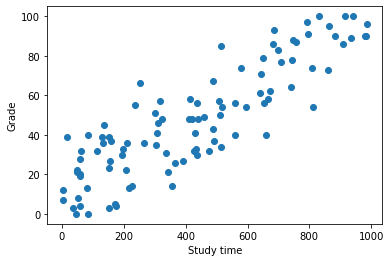

In [4]:
plt.scatter(df["study_time"], df["grades"])
plt.xlabel("Study time")
plt.ylabel("Grade");

### Polynomial regression 

- Equation

$ y = b + a_{1}x + a_{2}x^2 + \cdots + a_{k}x^{k} + e $ 

- Matricial form

$Ma=b$


$\begin{bmatrix} \sum_{i=1}^{N} x_i^0 & \sum_{i=1}^{N} x_i & \cdots & \sum_{i=1}^{N} x_i^k \\ \sum_{i=1}^{N} x_i & \sum_{i=1}^{N} x_i^2 & \cdots & \sum_{i=1}^{N} x_i^{k+1} \\ \vdots & \vdots & \vdots & \vdots \\ \sum_{i=1}^{N} x_i^k & \sum_{i=1}^{N} x_i^{k+1} & \cdots & \sum_{i=1}^{N} x_i^{2k} \end{bmatrix} \begin{bmatrix} a_0 \\ a_1 \\ \vdots \\ a_k \\ \end{bmatrix} = \begin{bmatrix} \sum_{i=1}^{N} x_i^0y_i \\ \sum_{i=1}^{N} x_i y_i \\ \vdots \\ \sum_{i=1}^{N} x_i^k y_i \\ \end{bmatrix}$



In [5]:
def row(data,row_number,k):
    return [sum([e**(row_number+i) for e in data])for i in range(k+1)]

def matrix_m(data,k):
    return np.array([row(data, i, k) for i in range(k+1)], dtype='float')

In [6]:
def vector_b(x,y,k):
    return np.array([sum((x**i)*y) for i in range(k+1)], dtype='float')

In [7]:
x = df["study_time"]
y = df["grades"]

In [9]:
x

0     865
1       4
2     305
3     437
4     682
     ... 
95    252
96     49
97    792
98    310
99    934
Name: study_time, Length: 100, dtype: int64

In [10]:
k = 1 # Polinomio grado 1 = recta
M = matrix_m(x,k)
b = vector_b(x,y,k)

In [11]:
M

array([[1.0000000e+02, 4.2854000e+04],
       [4.2854000e+04, 2.6419576e+07]])

In [12]:
b

array([   4794., 2734078.])

In [13]:
a = np.linalg.solve(M, b)

In [14]:
a

array([11.78070718,  0.08437787])

In [16]:
def predict(x,coef):
    return sum([(x**i)*coef[i] for i in range(len(coef))])

In [17]:
x_ = np.linspace(x.min(), x.max(), 100)
y_pred = predict(x_,a)
y_pred[:5]

array([11.94946292, 12.78812782, 13.62679272, 14.46545762, 15.30412252])

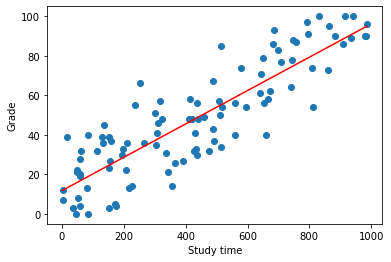

In [19]:
plt.scatter(df["study_time"], df["grades"])
plt.xlabel("Study time")
plt.ylabel("Grade")
plt.plot(x_, y_pred, c="red");

In [20]:
df.iloc[27]

study_time    196
grades         33
Name: 27, dtype: int64

In [21]:
predict(196,a)

28.318769886565413

In [24]:
abs(predict(196,a) - df.iloc[27]["grades"])
# (Mean) Absolute Error

4.681230113434587

In [53]:
coef = {}
for k in [1,2,3,4,25]:
    M = matrix_m(x,k)
    b = vector_b(x,y,k)
    coef[k] = np.linalg.solve(M,b)

In [54]:
coef

{1: array([11.78070718,  0.08437787]),
 2: array([1.50331985e+01, 6.20474830e-02, 2.39101989e-05]),
 3: array([ 1.66240350e+01,  4.06647505e-02,  8.02390902e-05, -3.87875097e-08]),
 4: array([ 1.06650148e+01,  1.67092724e-01, -5.08724893e-04,  9.01207980e-07,
        -4.79099517e-10]),
 25: array([-4.47751102e+08,  1.00771935e+08, -3.81940767e+06,  5.88696698e+04,
        -4.66127827e+02,  2.06020779e+00, -5.03341127e-03,  5.65332346e-06,
         4.55458301e-10, -5.21312982e-12, -1.85612881e-15,  4.04300865e-18,
         7.73540376e-21, -2.06129507e-24, -8.26537129e-27, -1.20477618e-29,
         8.33883482e-33,  2.09306922e-35,  4.76149578e-39, -2.51970097e-41,
        -1.20615069e-44,  1.70332187e-47,  1.52490077e-51,  1.51485684e-53,
        -2.36121018e-56,  8.07358361e-60])}

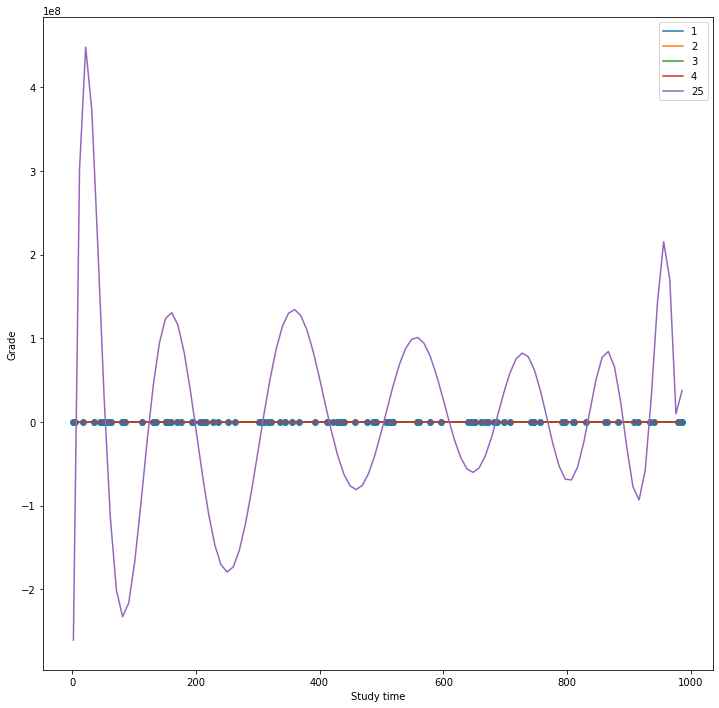

In [55]:
plt.figure(figsize=(12,12))
plt.scatter(df["study_time"], df["grades"])
plt.xlabel("Study time")
plt.ylabel("Grade")
for k, a in coef.items():
    y_pred = predict(x_, a)
    plt.plot(x_, y_pred, label=k)
plt.legend();

## Regression Error

In [56]:
from sklearn.metrics import mean_absolute_error as mae

In [57]:
df

,study_time,grades,y_pred_1,y_pred_2,y_pred_3,y_pred_4
0,865,95,84.767566,86.594480,86.732094,89.615137
1,4,12,12.118219,15.281771,16.787975,11.325304
2,305,35,37.515958,36.181927,35.390522,35.727839
3,437,56,48.653837,46.714055,46.480758,44.270412
4,682,86,69.326415,68.470789,69.374558,70.229845
...,...,...,...,...,...,...
95,252,66,33.043931,32.187557,31.346338,32.956262
96,49,21,15.915223,18.130934,18.804699,17.734374
97,792,97,78.607981,79.172812,79.892243,83.104980
98,310,46,37.937847,36.565688,35.785566,35.998599


In [58]:
for k, a in coef.items():
    y_pred = predict(df["study_time"], a)
    df[f"y_pred_{k}"] = y_pred

In [60]:
df

,study_time,grades,y_pred_1,y_pred_2,y_pred_3,y_pred_4,y_pred_25
0,865,95,84.767566,86.594480,86.732094,89.615137,-1.373679e+15
1,4,12,12.118219,15.281771,16.787975,11.325304,-1.021235e+08
2,305,35,37.515958,36.181927,35.390522,35.727839,8.580540e+10
3,437,56,48.653837,46.714055,46.480758,44.270412,2.212834e+12
4,682,86,69.326415,68.470789,69.374558,70.229845,-3.155653e+14
...,...,...,...,...,...,...,...
95,252,66,33.043931,32.187557,31.346338,32.956262,1.320234e+10
96,49,21,15.915223,18.130934,18.804699,17.734374,7.462909e+07
97,792,97,78.607981,79.172812,79.892243,83.104980,-7.988246e+14
98,310,46,37.937847,36.565688,35.785566,35.998599,9.595912e+10


In [61]:
mae(df["grades"],df["y_pred_1"])

11.402698299019335

In [62]:
mae(df["grades"],df["y_pred_2"])

11.3666537669717

In [63]:
mae(df["grades"],df["y_pred_25"])

316456196033614.8

In [47]:
errors = df.drop(columns=['y_pred_2', 'y_pred_3', 'y_pred_4'])

In [48]:
errors["AE"] = (errors["y_pred_1"] - errors["grades"]).abs()
errors

,study_time,grades,y_pred_1,AE
0,865,95,84.767566,10.232434
1,4,12,12.118219,0.118219
2,305,35,37.515958,2.515958
3,437,56,48.653837,7.346163
4,682,86,69.326415,16.673585
...,...,...,...,...
95,252,66,33.043931,32.956069
96,49,21,15.915223,5.084777
97,792,97,78.607981,18.392019
98,310,46,37.937847,8.062153


In [49]:
errors["AE"].mean()

11.402698299019335

In [50]:
errors["SE"] = errors["AE"]**2
errors

,study_time,grades,y_pred_1,AE,SE
0,865,95,84.767566,10.232434,104.702715
1,4,12,12.118219,0.118219,0.013976
2,305,35,37.515958,2.515958,6.330044
3,437,56,48.653837,7.346163,53.966114
4,682,86,69.326415,16.673585,278.008431
...,...,...,...,...,...
95,252,66,33.043931,32.956069,1086.102506
96,49,21,15.915223,5.084777,25.854959
97,792,97,78.607981,18.392019,338.266364
98,310,46,37.937847,8.062153,64.998308


In [51]:
errors["SE"].mean()

189.31609105092303

In [52]:
# RMSE ROOT Mean Squared Error
errors["SE"].mean()**.5

13.759218402617318

In [64]:
from sklearn.metrics import mean_squared_error as mse

In [65]:
mse(df["grades"],df["y_pred_1"])

189.31609105092303

# Another example of regression


$$y=.5x^2+x+2$$

$$n= $$


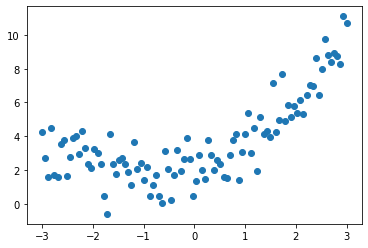

In [68]:
n_points = 100
x = np.linspace(-3,3, n_points)

noise = np.random.normal(0,1,n_points)
data_y =  .5*x**2 + x + 2 + noise

plt.scatter(x,data_y);

In [69]:
y_pred = {}
for k in [1,2,4,25,300]:
    M = matrix_m(x,k)
    b = vector_b(x, data_y, k)
    coef = np.linalg.solve(M,b)
    y_pred[k] = predict(x, coef)

In [70]:
pd.DataFrame({"error":{k:mse(data_y,y_pred[k])**.5 for k in y_pred.keys()}})

,error
1,1.790241
2,1.063640
4,1.040214
25,0.936088
300,0.864381


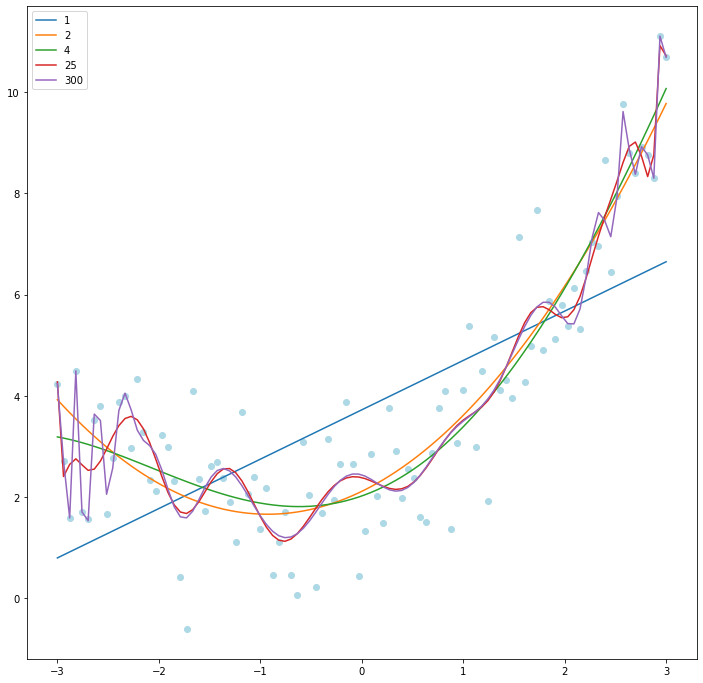

In [72]:
plt.figure(figsize=(12,12))
plt.scatter(x,data_y, c="lightblue")
for k,y in y_pred.items():
    plt.plot(x,y, label=k)
plt.legend();

In [73]:
y = {}
x_ = np.linspace(-3,3,200)
for k in [1,2,25,300]:
    M = matrix_m(x,k)
    b = vector_b(x, data_y, k)
    coef = np.linalg.solve(M,b)
    y[k] = predict(x_, coef)

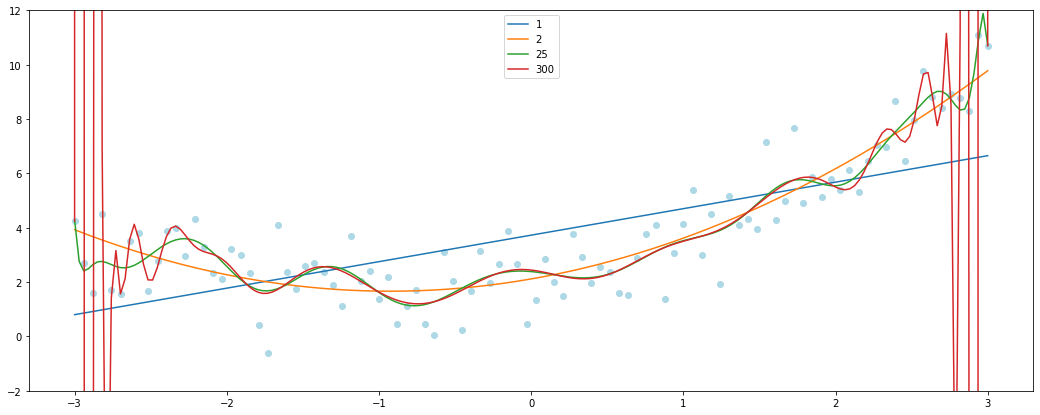

In [74]:
plt.figure(figsize=(18,7))
plt.scatter(x,data_y, c="lightblue")
for k,y_ in y.items():
    plt.plot(x_,y_, label=k)
plt.legend()
plt.ylim([-2,12]);

## Underfitting, Overfitting

![](img/fitting.png)

## Train Test Split

In [75]:
print(len(x), len(data_y))

100 100


In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,data_y)

In [80]:
X_train.shape

(75,)

In [81]:
X_test.shape

(25,)

In [82]:
coef = {}
for k in [1,2,25,300]:
    M = matrix_m(X_train, k)
    b = vector_b(X_train, y_train, k)
    coef[k] = np.linalg.solve(M,b)

In [83]:
y_pred_train = {}
y_pred_test = {}
for k,a in coef.items():
    y_pred_train[k] = predict(X_train,a)
    y_pred_test[k] = predict(X_test,a)

In [84]:
errors = pd.DataFrame({
    "train_rmse":{
        k:mse(y_train,y_pred_train[k])**.5 for k in y_pred_train.keys()
    },
    "test_rmse":{
        k:mse(y_test,y_pred_test[k])**.5 for k in y_pred_test.keys()
    }
})

In [85]:
errors

,train_rmse,test_rmse
1,1.824390,1.733522e+00
2,1.056921,1.105677e+00
25,0.913532,4.628229e+00
300,0.928798,8.796643e+06
